In [1]:
# Here are the imports we'll need for this notebook
import pandas as pd
from nltk import FreqDist

In [2]:
# this will execute and show the output from
# all code cells of the specified notebook
# This might take a couple minutes to process
%run ./CleanText.ipynb

Now we have all the tweets inside a <class 'pandas.core.frame.DataFrame'>
There are a total of 5000 tweets in our dataset
Here are the columns we have: 
   Index(['created', 'description', 'followers', 'friends_count', 'hashtags',
       'id_str', 'loc', 'message', 'name', 'original_id', 'original_name',
       'retweet', 'retweet_count', 'text', 'topics', 'user_created'],
      dtype='object')
FreqDist	 SnowballStemmer	 df	 nltk	 pd	 re	 remove_stop_words	 stemmer	 
Stored 'df' (DataFrame)


In [3]:
# Let's open the df from CleanText
%store -r df

In [4]:
# And take a quick look at what we've got
df.head()

,created,description,followers,friends_count,hashtags,id_str,loc,message,name,original_id,original_name,retweet,retweet_count,text,topics,user_created,tokenized,tags,no_stop,stems
0,2017-01-30 02:00:02,@mashable entertainment reporter. Proud native...,7912,6742,[],825886254981976064,Los Angeles,Was curious what was leading Breitbart. In cas...,saba_h,NaN,None,N,0,Was curious what was leading Breitbart. In cas...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2010-08-22 04:16:16,"[Was, curious, what, was, leading, Breitbart, ...","[(Was, NNP), (curious, JJ), (what, WP), (was, ...","[Was, curious, leading, Breitbart, ., In, case...","[was, curious, lead, breitbart, ., in, case, ,..."
1,2017-01-30 02:00:02,Novelist/freelance editor; Producer and Host ...,2576,2808,[],825886256806690816,Colorado,RT @RaheemKassam: College Lecturer Punched In ...,LichenCraig,1.251287e+08,Raheem Kassam,Y,0,RT @RaheemKassam: College Lecturer Punched In ...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2012-01-31 03:42:35,"[RT, @, RaheemKassam, :, College, Lecturer, Pu...","[(RT, NNP), (@, NNP), (RaheemKassam, NNP), (:,...","[RT, @, RaheemKassam, :, College, Lecturer, Pu...","[rt, @, raheemkassam, :, colleg, lectur, punch..."
2,2017-01-30 02:00:02,NJ conservative.Christian.God Bless the U.S. D...,1731,2408,"[""CrybabiesCantLead""]",825886258283085824,None,RT @Darren32895836: Head Clown @chuckschumer p...,RostaMan09,4.761065e+09,STOCK MONSTER,Y,0,RT @Darren32895836: Head Clown @chuckschumer p...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2009-07-28 01:27:11,"[RT, @, Darren32895836, :, Head, Clown, @, chu...","[(RT, NNP), (@, NNP), (Darren32895836, NNP), (...","[RT, @, Darren32895836, :, Head, Clown, @, chu...","[rt, @, darren32895836, :, head, clown, @, chu..."
3,2017-01-30 02:00:02,Mother/wife~ Constitutionalist ~ conservative ...,1231,1461,[],825886258798936064,United States,"RT @Timtravels007: On 12 September 2001, Ameri...",roadtosingapore,7.275292e+17,Deplorable Tim 🇺🇸,Y,0,"RT @Timtravels007: On 12 September 2001, Ameri...","[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2011-01-27 03:06:46,"[RT, @, Timtravels007, :, On, 12, September, 2...","[(RT, NNP), (@, NNP), (Timtravels007, NNP), (:...","[RT, @, Timtravels007, :, On, 12, September, 2...","[rt, @, timtravels007, :, on, 12, septemb, 200..."
4,2017-01-30 02:00:02,#MAGA. Owner of guns and partially blind so I ...,266,343,"[""AmericaFirst"", ""TrumpCabinet"", ""PresidentTru...",825886257746149376,State Of Confusion,RT @bfraser747: 🇺🇸🇺🇸 #AmericaFirst \n\nStop de...,pilikianocan,2.748912e+08,Brian Fraser,Y,0,RT @bfraser747: 🇺🇸🇺🇸 #AmericaFirst \n\nStop de...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-06-21 19:29:25,"[RT, @, bfraser747, :, 🇺🇸🇺🇸, #, AmericaFirst, ...","[(RT, NNP), (@, NNP), (bfraser747, NN), (:, :)...","[RT, @, bfraser747, :, 🇺🇸🇺🇸, #, AmericaFirst, ...","[rt, @, bfraser747, :, 🇺🇸🇺🇸, #, americafirst, ..."


In [5]:
#Let's see what hashtags are most common
#As we can see from above, we'll need a way to extract individual hashtags from tweets that used multiple hashtags
def extract_hashtags(hashtag):
    return re.findall(r'"([^"]*)"', hashtag)

In [6]:
#Now let's run through the dataframe and put all the hashtags into one list
tags = [extract_hashtags(df['hashtags'][x]) for x in range(len(df)) if len(df['hashtags'][x]) != 2] # i.e. []

In [7]:
#Now we have a list of lists. Let's flatten it into a single list
all_hastags = [item for sublist in tags for item in sublist]

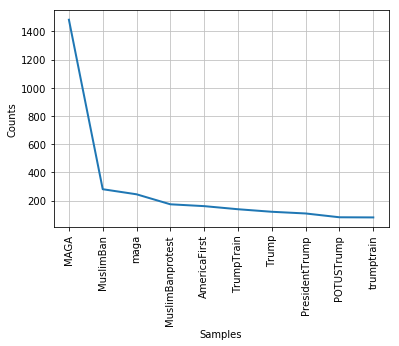

In [8]:
#OK, now let's create a frequency distribution of all the hashtags and plot it
fdist = FreqDist(all_hastags)
fdist.plot(10)

## False positives

This plot looks roughly like what I'd expect, with one exception. #MuslimBanprotest seems to be someone opposed to Trump. Let's look at this in more detail to see if we have a false positive

In [9]:
#Let's make a df with tweets that could be false positives
poss_false_positive = df[df['hashtags'].str.contains('MuslimBanprotest')]
poss_false_positive.head()

,created,description,followers,friends_count,hashtags,id_str,loc,message,name,original_id,original_name,retweet,retweet_count,text,topics,user_created,tokenized,tags,no_stop,stems
72,2017-01-30 02:00:15,"Love God, my family and my country! #MAGA",479,581,"[""MuslimBan"", ""MuslimBanprotest"", ""MAGA""]",825886312431570944,"Georgia, USA",RT @Lrihendry: Where are the Feminists? \n\n#M...,Rigsmimi,129235890.0,Lori Hendry,Y,0,RT @Lrihendry: Where are the Feminists? \n\n#M...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2009-04-21 20:39:19,"[RT, @, Lrihendry, :, Where, are, the, Feminis...","[(RT, NNP), (@, NNP), (Lrihendry, NNP), (:, :)...","[RT, @, Lrihendry, :, Where, Feminists, ?, #, ...","[rt, @, lrihendri, :, where, feminist, ?, #, m..."
77,2017-01-30 02:00:16,Married father of 5. Retired Battalion Chief f...,1638,2154,"[""POTUSTrump"", ""MuslimBanprotest""]",825886314490916864,None,"RT @Lrihendry: #POTUSTrump \n\nTo be clear, th...",iceman5th,129235890.0,Lori Hendry,Y,0,"RT @Lrihendry: #POTUSTrump \n\nTo be clear, th...","[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2011-11-05 02:47:20,"[RT, @, Lrihendry, :, #, POTUSTrump, To, be, c...","[(RT, NNP), (@, NNP), (Lrihendry, NNP), (:, :)...","[RT, @, Lrihendry, :, #, POTUSTrump, To, clear...","[rt, @, lrihendri, :, #, potustrump, to, clear..."
91,2017-01-30 02:00:18,#Election2016 Space Technology & Science,196,400,"[""POTUSTrump"", ""MuslimBanprotest""]",825886325706522624,"Ohio, USA","RT @Lrihendry: #POTUSTrump \n\nTo be clear, th...",bentbrain3901,129235890.0,Lori Hendry,Y,0,"RT @Lrihendry: #POTUSTrump \n\nTo be clear, th...","[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-10-10 23:18:52,"[RT, @, Lrihendry, :, #, POTUSTrump, To, be, c...","[(RT, NNP), (@, NNP), (Lrihendry, NNP), (:, :)...","[RT, @, Lrihendry, :, #, POTUSTrump, To, clear...","[rt, @, lrihendri, :, #, potustrump, to, clear..."
108,2017-01-30 02:00:21,"Conservative: Husband, Father and Grandpa. Lif...",1615,1510,"[""MuslimBanprotest"", ""MuslimBan"", ""MAGA""]",825886335143702528,U.S.A.,RT @Lrihendry: Judge Michael Mukasey: Aliens h...,shepbiz,129235890.0,Lori Hendry,Y,0,RT @Lrihendry: Judge Michael Mukasey: Aliens h...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2010-03-15 21:38:08,"[RT, @, Lrihendry, :, Judge, Michael, Mukasey,...","[(RT, NNP), (@, NNP), (Lrihendry, NNP), (:, :)...","[RT, @, Lrihendry, :, Judge, Michael, Mukasey,...","[rt, @, lrihendri, :, judg, michael, mukasey, ..."
109,2017-01-30 02:00:21,"E Pluribus Unum #2A. #MAGA No Tories, no commies.",299,285,"[""POTUSTrump"", ""MuslimBanprotest""]",825886335022014464,"South Carolina, USA","RT @Lrihendry: #POTUSTrump \n\nTo be clear, th...",SC_GYoung,129235890.0,Lori Hendry,Y,0,"RT @Lrihendry: #POTUSTrump \n\nTo be clear, th...","[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2014-02-19 02:46:42,"[RT, @, Lrihendry, :, #, POTUSTrump, To, be, c...","[(RT, NNP), (@, NNP), (Lrihendry, NNP), (:, :)...","[RT, @, Lrihendry, :, #, POTUSTrump, To, clear...","[rt, @, lrihendri, :, #, potustrump, to, clear..."


In [10]:
pd.set_option('display.max_colwidth', -1) #This tells pandas to make the column width the size of the lagest column, so nothing is lost
poss_false_positive['message'].head(20)

72     RT @Lrihendry: Where are the Feminists? \n\n#MuslimBan #MuslimBanprotest #MAGA https://t.co/Mmf9GdS14T                                      
77     RT @Lrihendry: #POTUSTrump \n\nTo be clear, this is NOT a Muslim ban as the media is falsely reporting! \n\n#MuslimBanprotest…              
91     RT @Lrihendry: #POTUSTrump \n\nTo be clear, this is NOT a Muslim ban as the media is falsely reporting! \n\n#MuslimBanprotest…              
108    RT @Lrihendry: Judge Michael Mukasey: Aliens have NO rights under the American Constitution! #MuslimBanprotest #MuslimBan #MAGA https://t.c…
109    RT @Lrihendry: #POTUSTrump \n\nTo be clear, this is NOT a Muslim ban as the media is falsely reporting! \n\n#MuslimBanprotest…              
136    RT @Lrihendry: Judge Michael Mukasey: Aliens have NO rights under the American Constitution! #MuslimBanprotest #MuslimBan #MAGA https://t.c…
145    RT @Lrihendry: Judge Michael Mukasey: Aliens have NO rights under the American Constitution! #MuslimBanpr

In [11]:
# Lots of retweets. Let's try to filter those out.
poss_false_positive[poss_false_positive['retweet'] == 'N']['message'].head(20)

370     O terrorista de San Bernardino teve visto LEGAL demasiado! #MuslimBanprotest #MAGA https://t.co/JU7fcQJRaM                              
1440    Wow... \n#racism #america #NoBanNoWall #immigrationban #DonaldTrump #maga #MuslimBanprotest #Facebook #GOP #DNC… https://t.co/lCzxZu4U0e
1523    Wow... \n#racism #america #NoBanNoWall #immigrationban #DonaldTrump #maga #MuslimBanprotest #Facebook #GOP #DNC… https://t.co/XtK2WHvc8Z
1619    Wow... \n#racism #america #NoBanNoWall #immigrationban #DonaldTrump #maga #MuslimBanprotest #Facebook #GOP #DNC… https://t.co/uq7avduCOu
1696    Why didn't people (aka the left) freak out in 2011 when Obama banned everyone from Iraq? #maga #MuslimBan #MuslimBanprotest #hipocracy  
1720    Wow... \n#racism #america #NoBanNoWall #immigrationban #DonaldTrump #maga #MuslimBanprotest #Facebook #GOP #DNC… https://t.co/SxT61dA1QV
1831    Wow... \n#racism #america #NoBanNoWall #immigrationban #DonaldTrump #maga #MuslimBanprotest #Facebook #GOP #DNC… https://t

Hmm, tweets are messy